# Homework 6
## Mengxiang Jiang

The majority of the code here comes from the [Companion Jupyter notebooks for the book "Deep Learning with Python"](https://github.com/fchollet/deep-learning-with-python-notebooks) by François Chollet, specifically chapter 5.
If the code comes from somewhere else it will have a source linked to the original.\
[Video Link](https://youtu.be/NkAeBiCHm-I)

## Improving generalization
**Original model**

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

def build_model():
    model = keras.Sequential([
        layers.Dense(16, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer="rmsprop",
                loss="binary_crossentropy",
                metrics=["accuracy"])
    return model

model = build_model()
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

2023-03-05 22:01:52.781074: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-05 22:01:52.900477: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-05 22:01:56.091298: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023

Epoch 1/20


2023-03-05 22:01:57.772087: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-03-05 22:01:57.777804: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x1f091290 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-03-05 22:01:57.777828: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2023-03-05 22:01:57.780436: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-03-05 22:01:57.834894: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


30/30 [==============================] - 2s 25ms/step - loss: 0.5392 - accuracy: 0.7743 - val_loss: 0.4190 - val_accuracy: 0.8553
Epoch 2/20
30/30 [==============================] - 0s 10ms/step - loss: 0.3364 - accuracy: 0.8907 - val_loss: 0.3170 - val_accuracy: 0.8848
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2520 - accuracy: 0.9165 - val_loss: 0.2905 - val_accuracy: 0.8869
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2017 - accuracy: 0.9328 - val_loss: 0.2787 - val_accuracy: 0.8882
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1703 - accuracy: 0.9424 - val_loss: 0.2740 - val_accuracy: 0.8917
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1439 - accuracy: 0.9525 - val_loss: 0.2803 - val_accuracy: 0.8899
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1238 - accuracy: 0.9608 - val_loss: 0.2916 - val_accuracy: 0.8871
Epoch 8/20
30/30 [======

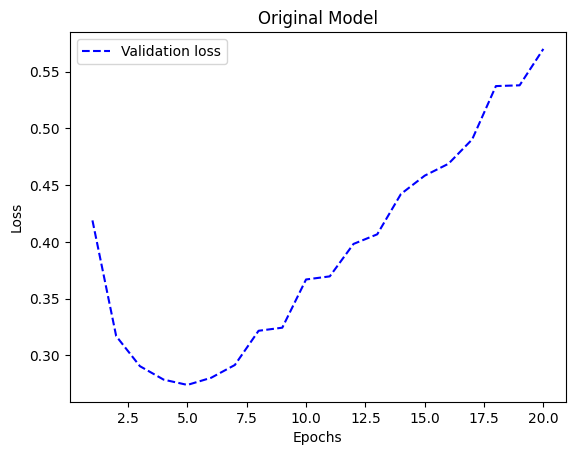

In [2]:
import matplotlib.pyplot as plt

val_loss = history_original.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Original Model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

**Data Subset Function**

I asked ChatGPT "write a python function with input numpy array data, numpy array labels, and integer size such that the output is subset_data, subset_labels, where the subset_labels have the same ratio of labels as the original" and it gave a function very similar to the one below with minor errors. I fixed those errors and it works really well.

In [3]:
def create_data_subset(data, labels, size):
    """
    Create a random subset of data and labels with equal ratio of labels.

    Args:
    - data: A numpy array of training data
    - labels: A numpy array of training labels
    - size: The desired size of the subset

    Returns:
    - A tuple containing two numpy arrays: the subset of data and the subset of labels
    """
    # Count the number of data points in each class
    uniq_classes = np.unique(labels)
    num_classes = len(uniq_classes)
    num_points_per_class = int(size / num_classes)

    # Create a dictionary of list of indices for each class
    class_indices = {}
    for c in uniq_classes:
        class_indices[c] = np.where(labels == c)[0]

    # Select a random subset of indices from each class
    subset_indices = []
    for c in uniq_classes:
        subset_indices.extend(
            np.random.choice(
                class_indices[c], 
                size=num_points_per_class, 
                replace=False
            )
        )

    # Shuffle the subset indices and select the subset of data and labels
    np.random.shuffle(subset_indices)
    subset_data = data[subset_indices]
    subset_labels = labels[subset_indices]

    return subset_data, subset_labels

train_data_5k, train_labels_5k = create_data_subset(train_data, train_labels, 5000)
train_data_10k, train_labels_10k = create_data_subset(train_data, train_labels, 10000)
train_data_15k, train_labels_15k = create_data_subset(train_data, train_labels, 15000)
train_data_20k, train_labels_20k = create_data_subset(train_data, train_labels, 20000)

**Fitting Model on Subsets**

Originally I didn't rebuild the model and was confused on how every model seemed to be performing better in the order they were fitted.
Then I looked back on the k-fold approach from last chapter and realized I needed to rebuild.

In [4]:
model = build_model()
history_5k = model.fit(train_data_5k, train_labels_5k,
                             epochs=20, batch_size=512, validation_split=0.4, verbose=0)
model = build_model()
history_10k = model.fit(train_data_10k, train_labels_10k,
                             epochs=20, batch_size=512, validation_split=0.4, verbose=0)
model = build_model()
history_15k = model.fit(train_data_15k, train_labels_15k,
                             epochs=20, batch_size=512, validation_split=0.4, verbose=0)
model = build_model()
history_20k = model.fit(train_data_20k, train_labels_20k,
                             epochs=20, batch_size=512, validation_split=0.4, verbose=0)

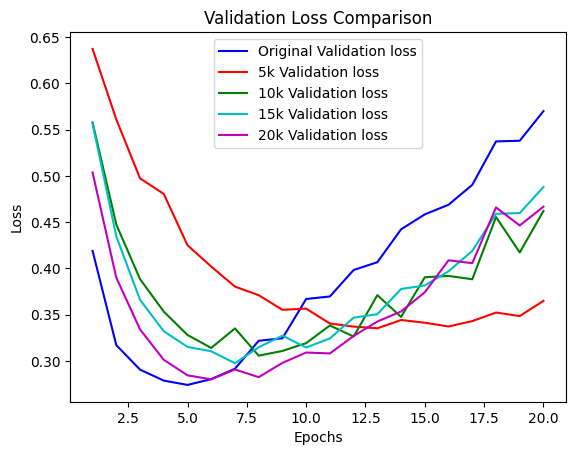

In [5]:
val_loss_original = history_original.history["val_loss"]
val_loss_5k = history_5k.history["val_loss"]
val_loss_10k = history_10k.history["val_loss"]
val_loss_15k = history_15k.history["val_loss"]
val_loss_20k = history_20k.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss_original, "b-",
         label="Original Validation loss")
plt.plot(epochs, val_loss_5k, "r-",
         label="5k Validation loss")
plt.plot(epochs, val_loss_10k, "g-",
         label="10k Validation loss")
plt.plot(epochs, val_loss_15k, "c-",
         label="15k Validation loss")
plt.plot(epochs, val_loss_20k, "m-",
         label="20k Validation loss")
plt.title("Validation Loss Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

**Observations on Overfitting**

I made the prediction in class that models trained on smaller datasets would overfit earlier, but clearly I was wrong as seen the the graph above.
The smaller dataset took longer to overfit and also had higher loss when they start to overfit.

**Note for 2nd Part of Homework**

Since the 5k dataset with the original model already takes almost 20 epochs just to overfit, the effects of regularization techniques will not show up with so few epochs. Therefore I have increased the number of epochs to 100 for better comparisons.

In [6]:
model = build_model()
history_5k = model.fit(train_data_5k, train_labels_5k,
                             epochs=100, batch_size=512, validation_split=0.4, verbose=0)

**Smaller Model Regularization**

In [7]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model_5k = model.fit(
    train_data_5k, train_labels_5k,
    epochs=100, batch_size=512, validation_split=0.4, verbose=0)

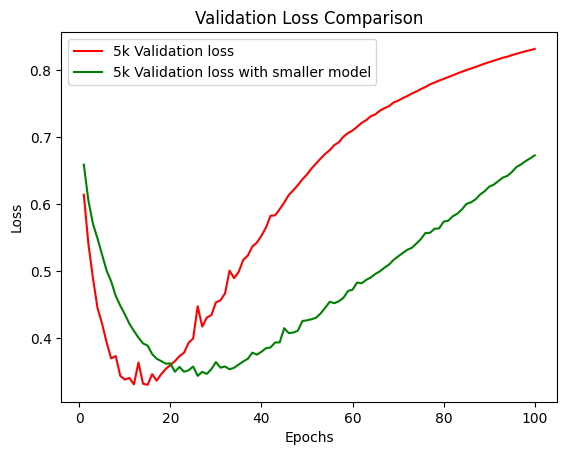

In [8]:
val_loss_5k = history_5k.history["val_loss"]
val_loss_small_5k = history_smaller_model_5k.history["val_loss"]
epochs = range(1, 101)
plt.plot(epochs, val_loss_5k, "r-",
         label="5k Validation loss")
plt.plot(epochs, val_loss_small_5k, "g-",
         label="5k Validation loss with smaller model")
plt.title("Validation Loss Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

**Observations on Overfitting**

The smaller model clearly took longer to overfit as seen in the graph above, and the growth of the loss function is slower after overfitting as well.

**Dropout Regularization**

In [11]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout_5k = model.fit(
    train_data_5k, train_labels_5k,
    epochs=100, batch_size=512, validation_split=0.4, verbose=0)

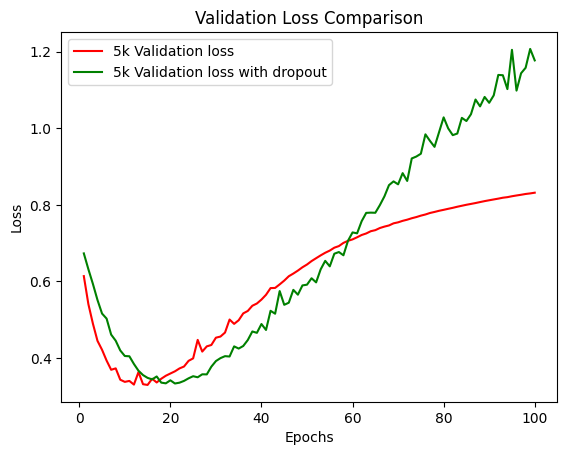

In [12]:
val_loss_5k = history_5k.history["val_loss"]
val_loss_dropout_5k = history_dropout_5k.history["val_loss"]
epochs = range(1, 101)
plt.plot(epochs, val_loss_5k, "r-",
         label="5k Validation loss")
plt.plot(epochs, val_loss_dropout_5k, "g-",
         label="5k Validation loss with dropout")
plt.title("Validation Loss Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

**Observations on Overfitting**

The dropout model took slightly longer to overfit as seen in the graph above, but the growth of the loss function after overfitting is faster.